# 介紹
此專案使用神經網路與CNN，對MNIST提供之手寫數字圖片進行分類辨識

# 安裝套件

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# 可以查看當前版本
tf.__version__

'2.15.0'

# DNN

In [ ]:
# 設定種子解決隨機問題
np.random.seed(10)
tf.random.set_seed(10)

# 導入資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()
len(x_train), len(x_test)

(60000, 10000)

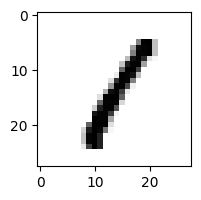

In [ ]:
def plot_image(image):
  fig = plt.gcf()  # 抓當前的圖
  fig.set_size_inches(2,2)
  plt.imshow(image, cmap="binary")  # 二元(黑白)圖
  plt.show()
plot_image(x_train[3])

In [ ]:
# 建立函數: 顯示一組圖像與其對應的標籤和預測值
def plot_images_labels_prediction(image, label, prediction, idx, num = 10):
  #設定顯示圖片大小
  fig = plt.gcf()  # 獲取當前圖片
  fig.set_size_inches(12,12)  # 圖片大小12*12英吋

  # 一張張圖呈現
  for i in range(0, min(num, 25)):  # 最多25張

    # 建立圖片5*5(五行*五列)
    ax = plt.subplot(5, 5, i+1)

    # 畫圖
    plt.imshow(image[idx], cmap="binary") #二元(黑白)圖

    # 標題與label
    title = "label=" + str(label[idx])

    # 如果有傳入預測結果也一起顯示出來
    if len(prediction) > 0:
      title = title + ", predict=" + str(prediction[idx])

    # 設定圖片標題大小
    ax.set_title(title, fontsize=10)

    # 不顯示刻度
    ax.set_xticks([]);ax.set_yticks([])

    idx += 1
  plt.show()




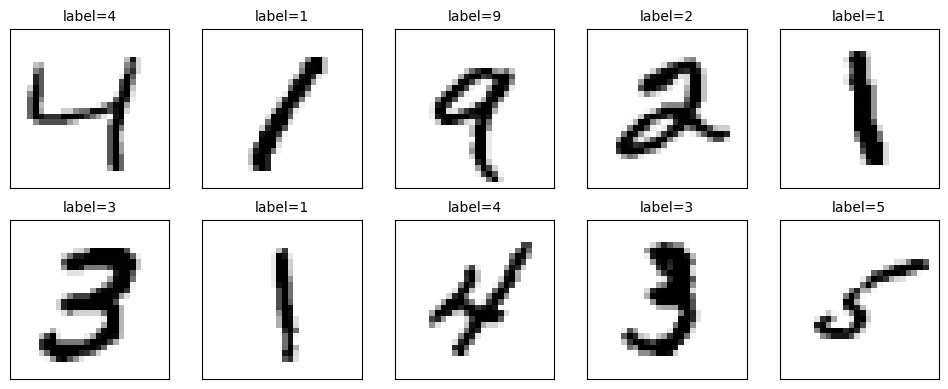

In [ ]:
plot_images_labels_prediction(x_train, y_train, [], 2, 10)

### 資料處理

In [ ]:
# 確認資料結構
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# 28*28的二維資料，若轉成一維則輸入784

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# Reshape data fit model
x_Train = x_train.reshape((60000, 28*28)).astype('float32')
x_Test = x_test.reshape((10000, 28*28)).astype('float32')

In [ ]:
# 正規化: 將資料範圍調整到0-1之間
x_Train_norm = x_Train / 255  # 灰階圖輸入會介於0-255，所以正規化時除以255
x_Test_norm = x_Test / 255

####label前處理: 使用one hot encoding

In [ ]:
# 看label原本型態
y_train[:5] #0~9的數字

array([5, 0, 4, 1, 9], dtype=uint8)

*   0 -> 10000 00000
*   1 -> 01000 00000
*   2 -> 00100 00000
*   3 -> 00010 00000
....

In [ ]:
# 標籤獨熱化
tf.keras.utils.to_categorical(y_train[:5])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
y_TrainOneHot = tf.keras.utils.to_categorical(y_train)
y_TestOneHot = tf.keras.utils.to_categorical(y_test)

In [ ]:
# 抓第一筆資料出來檢查
# 資料從0到9
print(y_TrainOneHot[0])  # 第一筆資料是5
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


### 建模

In [ ]:
model = tf.keras.Sequential([
    # 輸入層
    tf.keras.layers.Dense(256, input_shape=(784,), kernel_initializer='normal',activation='relu'),  # 隱藏層256神經元，輸入向量28*28=784，類型:浮點數字
    # 輸出層:10個(數字0~9)
    tf.keras.layers.Dense(10, kernel_initializer='normal',activation='softmax')  # 神經元10，權重：常態分布初始化
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 dense_17 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 訓練

In [ ]:
# compile + fit
# 訓練前用compile對模型設定
# optimizer用Adam: 看能不能快速收斂，提高準確率
# loss fn: CrossEntropy
# metrics 評估模型方式: accuracy

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# train model
train_history = model.fit(
    x = x_Train_norm,
    y = y_TrainOneHot,
    validation_split = 0.2,
    epochs = 10,
    batch_size = 32,
    verbose = 2
)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 dense_17 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1500/1500 - 9s - loss: 0.2704 - accuracy: 0.9231 - val_loss: 0.1498 - val_accuracy: 0.9563 - 9s/epoch - 6ms/step
Epoch 2/10
1500/1500 - 9s - loss: 0.1127 - accuracy: 0.9664 - val_loss: 0.1098 - val_accuracy: 0.9678 - 9s/epoch - 6ms/step
Epoch 3/10
1500/1500 - 8s - loss: 0.0736 - accuracy: 0.9779 - val_loss: 0.1085 - val_accuracy: 0.9664 - 8s/epoch - 5ms/step
Epoch 4/10
1500/1500 - 9s - loss: 0.05

### 繪圖
建構function-查看準確率

In [ ]:
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title("Train history", fontsize=20)
  plt.xlabel("epoch")
  plt.ylabel("train")
  plt.legend(['Train','Val'], fontsize=16, loc="upper left")
  plt.show()

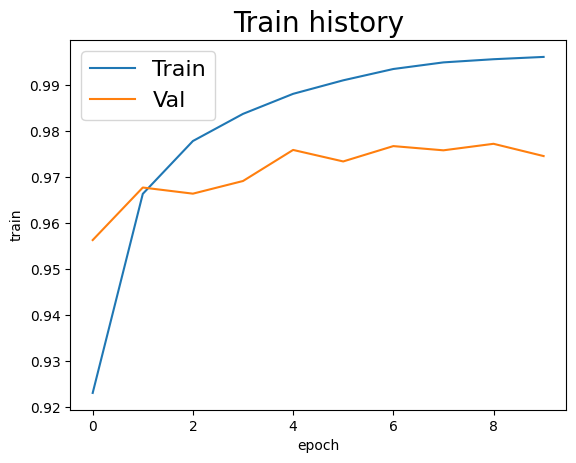

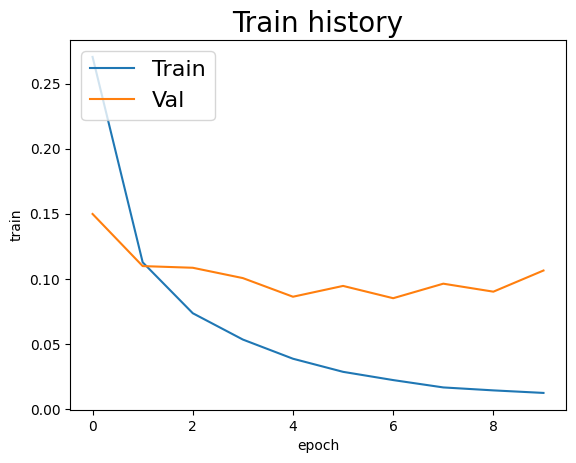

In [ ]:
# accuracy
show_train_history(train_history, 'accuracy', 'val_accuracy')
# loss
show_train_history(train_history, 'loss', 'val_loss')

### 測試集評估

In [ ]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)
print('accuracy:', scores[1])  # [0]是損失 [1]是準確率

313/313 [==============================] - 1s 3ms/step - loss: 0.0975 - accuracy: 0.9754
accuracy: 0.9753999710083008


313/313 [==============================] - 1s 2ms/step


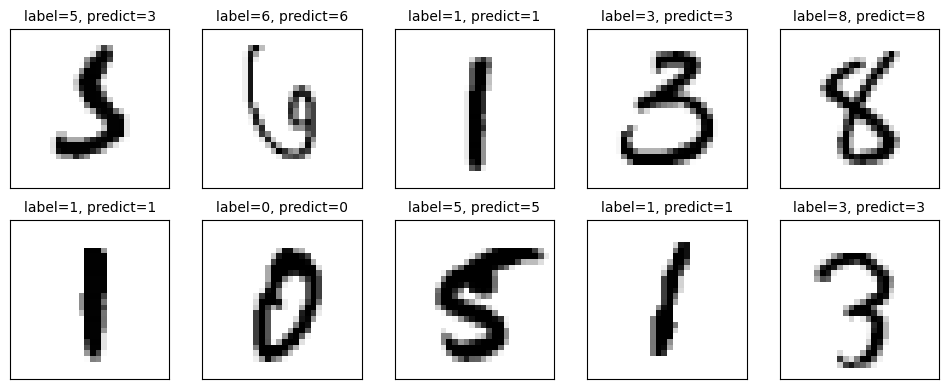

In [ ]:
# 執行預測
prediction = model.predict(x_Test)
predicted_classes = np.argmax(prediction, axis=1)
plot_images_labels_prediction(x_test, y_test, predicted_classes, idx=340, num=10)

### 混淆矩陣
用圖表來看預測結果

In [ ]:
pd.crosstab(y_test, predicted_classes, rownames=['label'], colnames=['prediction'])

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,1,0,0,2,1,2,1,0
1,0,1125,2,4,0,0,2,0,2,0
2,3,2,1014,4,1,0,2,5,1,0
3,0,0,3,999,0,0,0,3,1,4
4,3,2,7,0,936,1,1,7,1,24
5,6,1,0,24,1,849,3,1,3,4
6,7,2,3,1,5,3,935,0,1,1
7,0,2,9,5,0,0,0,995,1,16
8,4,0,3,25,3,2,2,4,920,11


### 調整模型

In [ ]:
# 由原本的模型加入Dropout
model2 = tf.keras.Sequential([

    tf.keras.layers.Dense(256, input_shape=(784,), kernel_initializer='normal',activation='relu'),

    tf.keras.layers.Dropout(0.5),  # 加入Dropout

    tf.keras.layers.Dense(10, kernel_initializer='normal',activation='softmax')
])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train model
train_history = model2.fit(
    x = x_Train_norm,
    y = y_TrainOneHot,
    validation_split = 0.2,
    epochs = 10,
    batch_size = 32,
    verbose = 2
)

Epoch 1/10
1500/1500 - 10s - loss: 0.3648 - accuracy: 0.8932 - val_loss: 0.1598 - val_accuracy: 0.9549 - 10s/epoch - 7ms/step
Epoch 2/10
1500/1500 - 10s - loss: 0.1874 - accuracy: 0.9441 - val_loss: 0.1141 - val_accuracy: 0.9670 - 10s/epoch - 7ms/step
Epoch 3/10
1500/1500 - 7s - loss: 0.1449 - accuracy: 0.9558 - val_loss: 0.1031 - val_accuracy: 0.9696 - 7s/epoch - 5ms/step
Epoch 4/10
1500/1500 - 9s - loss: 0.1247 - accuracy: 0.9620 - val_loss: 0.0932 - val_accuracy: 0.9719 - 9s/epoch - 6ms/step
Epoch 5/10
1500/1500 - 8s - loss: 0.1078 - accuracy: 0.9677 - val_loss: 0.0854 - val_accuracy: 0.9741 - 8s/epoch - 5ms/step
Epoch 6/10
1500/1500 - 9s - loss: 0.0995 - accuracy: 0.9687 - val_loss: 0.0835 - val_accuracy: 0.9764 - 9s/epoch - 6ms/step
Epoch 7/10
1500/1500 - 9s - loss: 0.0916 - accuracy: 0.9715 - val_loss: 0.0858 - val_accuracy: 0.9767 - 9s/epoch - 6ms/step
Epoch 8/10
1500/1500 - 7s - loss: 0.0793 - accuracy: 0.9746 - val_loss: 0.0872 - val_accuracy: 0.9758 - 7s/epoch - 5ms/step
Epoc

In [ ]:
scores = model2.evaluate(x_Test_norm, y_TestOneHot)
print('accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0697 - accuracy: 0.9802
accuracy: 0.9801999926567078


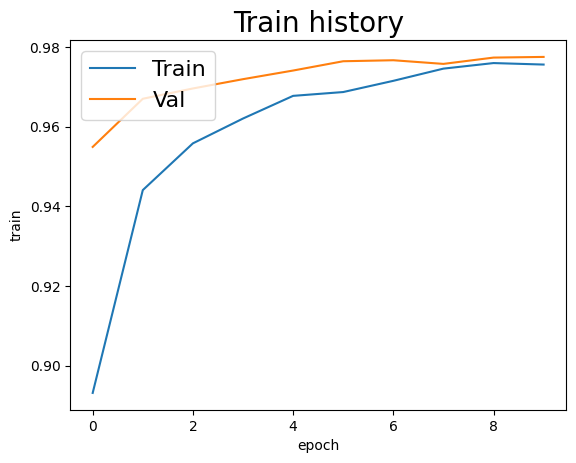

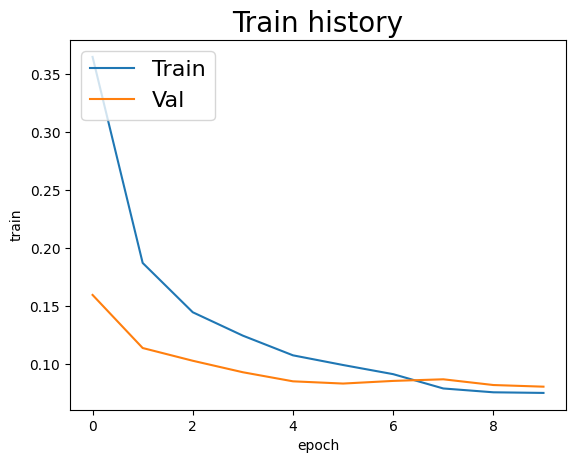

accuracy: 0.9801999926567078 loss: 0.06969581544399261


In [ ]:
show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')
print(f'accuracy: {scores[1]} loss: {scores[0]}')

In [ ]:
# 加入Dropout後，再加入隱藏層
model3 = tf.keras.Sequential([

    tf.keras.layers.Dense(256, input_shape=(784,), kernel_initializer='normal',activation='relu'),

    tf.keras.layers.Dropout(0.5),

    # 加隱藏層 & Dropout
    # 額外加入Dropout可以避免overfitting
    tf.keras.layers.Dense(256, kernel_initializer='normal',activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(10, kernel_initializer='normal',activation='softmax')
])
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 256)               200960    
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 256)               65792     
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train model
train_history = model3.fit(
    x = x_Train_norm,
    y = y_TrainOneHot,
    validation_split = 0.2,
    epochs = 10,
    batch_size = 32,
    verbose = 2
)

Epoch 1/10
1500/1500 - 11s - loss: 0.4044 - accuracy: 0.8760 - val_loss: 0.1482 - val_accuracy: 0.9557 - 11s/epoch - 7ms/step
Epoch 2/10
1500/1500 - 10s - loss: 0.2142 - accuracy: 0.9369 - val_loss: 0.1142 - val_accuracy: 0.9663 - 10s/epoch - 7ms/step
Epoch 3/10
1500/1500 - 12s - loss: 0.1785 - accuracy: 0.9473 - val_loss: 0.1054 - val_accuracy: 0.9690 - 12s/epoch - 8ms/step
Epoch 4/10
1500/1500 - 11s - loss: 0.1579 - accuracy: 0.9531 - val_loss: 0.1051 - val_accuracy: 0.9688 - 11s/epoch - 7ms/step
Epoch 5/10
1500/1500 - 12s - loss: 0.1433 - accuracy: 0.9572 - val_loss: 0.0934 - val_accuracy: 0.9720 - 12s/epoch - 8ms/step
Epoch 6/10
1500/1500 - 18s - loss: 0.1363 - accuracy: 0.9593 - val_loss: 0.0914 - val_accuracy: 0.9743 - 18s/epoch - 12ms/step
Epoch 7/10
1500/1500 - 12s - loss: 0.1264 - accuracy: 0.9625 - val_loss: 0.0936 - val_accuracy: 0.9732 - 12s/epoch - 8ms/step
Epoch 8/10
1500/1500 - 10s - loss: 0.1159 - accuracy: 0.9653 - val_loss: 0.0870 - val_accuracy: 0.9762 - 10s/epoch - 

313/313 [==============================] - 3s 8ms/step - loss: 0.0797 - accuracy: 0.9779


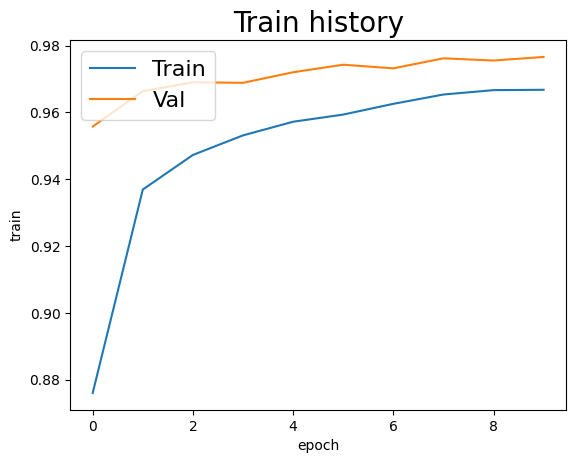

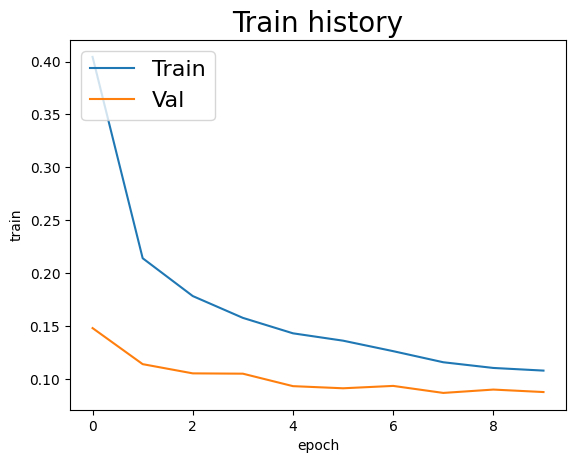

accuracy: 0.9779000282287598 loss: 0.07966063171625137


In [ ]:
scores = model3.evaluate(x_Test_norm, y_TestOneHot)

DNN_loss = train_history.history["loss"]
DNN_accuracy = train_history.history["accuracy"]
DNN_val_loss = train_history.history["val_loss"]
DNN_val_accuracy = train_history.history["val_accuracy"]
DNN_accuracy_scores = scores[1]
DNN_loss_scores = scores[0]

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')
print(f'accuracy: {scores[1]} loss: {scores[0]}')

# CNN

#### 資料處理

In [ ]:
# 先確認資料
x_train.shape[0]

60000

In [ ]:
# 將feature轉成4維度: 60000*28*28*1
x_Train4D = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_Test4D = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
# 正規化: 將資料範圍調整到0-1之間
x_Train4D_norm = x_Train4D / 255
x_Test4D_norm = x_Test4D / 255
# 標籤獨熱化
y_Train4DOneHot = tf.keras.utils.to_categorical(y_train)
y_Test4DOneHot = tf.keras.utils.to_categorical(y_test)

#### 建模

In [ ]:
model_CNN = tf.keras.Sequential([
    # 建立卷積&持化層1
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), padding='same', input_shape=(28,28,1), activation='relu'),  # 8個卷積核，大小3*3，输入输出相同(same)，輸入圖像形狀28*28*1，激活函數relu
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    # 建立卷積&池化層2
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),  # 16個卷積核，大小3*3，输入输出相同(same)，激活函數relu
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    # 建立一個Dropout層避免overfitting
    tf.keras.layers.Dropout(0.25), # 每次有25%神經元不做conection (Dropout)

    # 全鏈接：攤平
    tf.keras.layers.Flatten(),
    # 隱藏層
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # 定義輸出層10個(數字0~9)
    tf.keras.layers.Dense(10, activation='softmax')
])
model_CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_CNN.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 7, 7, 16)          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)             

#### 訓練模型

In [ ]:
# train model
train_history = model_CNN.fit(
    x = x_Train4D_norm,
    y = y_Train4DOneHot,
    validation_split = 0.2,
    epochs = 10,
    batch_size = 32,
    verbose = 2
)

Epoch 1/10
1500/1500 - 36s - loss: 0.3441 - accuracy: 0.8925 - val_loss: 0.0871 - val_accuracy: 0.9751 - 36s/epoch - 24ms/step
Epoch 2/10
1500/1500 - 38s - loss: 0.1455 - accuracy: 0.9559 - val_loss: 0.0683 - val_accuracy: 0.9794 - 38s/epoch - 26ms/step
Epoch 3/10
1500/1500 - 30s - loss: 0.1128 - accuracy: 0.9647 - val_loss: 0.0522 - val_accuracy: 0.9853 - 30s/epoch - 20ms/step
Epoch 4/10
1500/1500 - 25s - loss: 0.0961 - accuracy: 0.9707 - val_loss: 0.0534 - val_accuracy: 0.9847 - 25s/epoch - 17ms/step
Epoch 5/10
1500/1500 - 26s - loss: 0.0877 - accuracy: 0.9719 - val_loss: 0.0443 - val_accuracy: 0.9883 - 26s/epoch - 17ms/step
Epoch 6/10
1500/1500 - 29s - loss: 0.0781 - accuracy: 0.9762 - val_loss: 0.0436 - val_accuracy: 0.9875 - 29s/epoch - 19ms/step
Epoch 7/10
1500/1500 - 25s - loss: 0.0721 - accuracy: 0.9775 - val_loss: 0.0436 - val_accuracy: 0.9879 - 25s/epoch - 17ms/step
Epoch 8/10
1500/1500 - 26s - loss: 0.0677 - accuracy: 0.9786 - val_loss: 0.0389 - val_accuracy: 0.9893 - 26s/ep

#### 模型評估(準確率)

313/313 [==============================] - 2s 7ms/step - loss: 0.0318 - accuracy: 0.9898


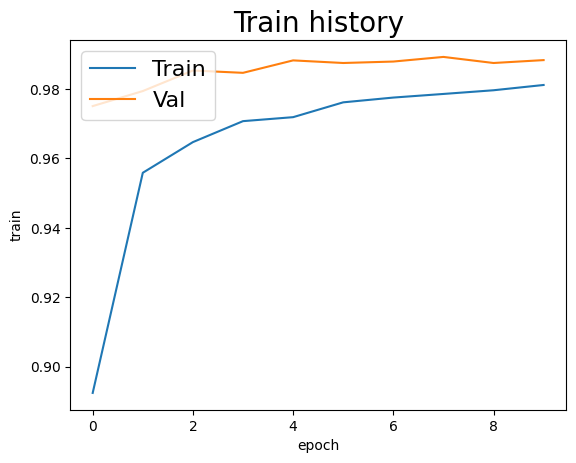

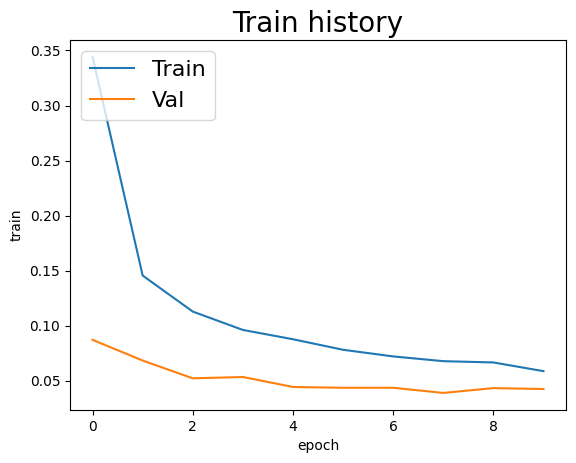

accuracy: 0.989799976348877 loss: 0.03175674006342888


In [ ]:
scores = model_CNN.evaluate(x_Test4D_norm, y_Test4DOneHot)

CNN_loss = train_history.history["loss"]
CNN_accuracy = train_history.history["accuracy"]
CNN_val_loss = train_history.history["val_loss"]
CNN_val_accuracy = train_history.history["val_accuracy"]
CNN_accuracy_scores = scores[1]
CNN_loss_scores = scores[0]


show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')
print(f'accuracy: {scores[1]} loss: {scores[0]}')

#### 執行預測

313/313 [==============================] - 3s 10ms/step


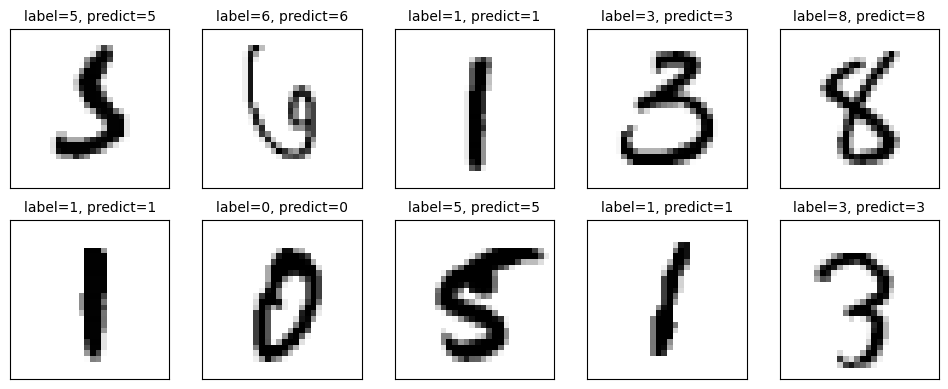

In [ ]:
# 執行預測
prediction = model_CNN.predict(x_Test4D)
predicted_classes = np.argmax(prediction, axis=1)
plot_images_labels_prediction(x_test, y_test, predicted_classes, idx=340, num=10)

In [ ]:
pd.crosstab(y_test, predicted_classes, rownames=['label'], colnames=['prediction'])

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,974,0,1,0,2,0,0,1,2,0
1,0,1125,2,0,1,0,0,1,6,0
2,2,1,1013,0,2,0,0,7,7,0
3,0,0,4,980,0,1,0,9,16,0
4,0,0,0,0,980,0,0,0,1,1
5,2,0,0,4,1,864,4,2,12,3
6,3,1,1,0,7,0,937,0,9,0
7,0,0,3,0,5,0,0,1018,1,1
8,1,0,1,0,2,0,0,3,966,1


# 結果比較
## DNN VS CNN

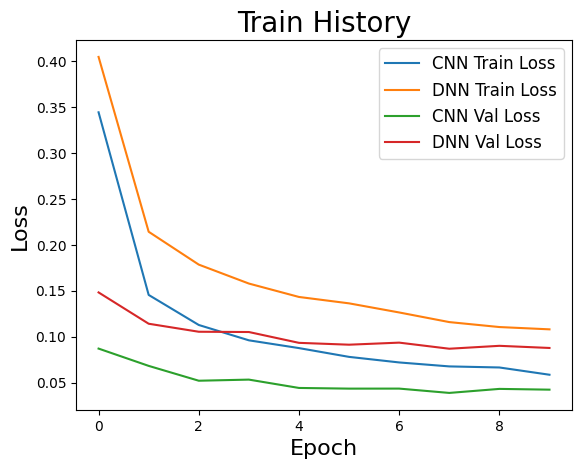

CNN accuracy: 0.989799976348877 
DNN accuracy 0.9779000282287598
CNN loss:: 0.03175674006342888
DNN loss: 0.07966063171625137


In [ ]:
plt.plot(CNN_loss, label='CNN Train Loss')
plt.plot(DNN_loss, label='DNN Train Loss')
plt.plot(CNN_val_loss, label='CNN Val Loss')
plt.plot(DNN_val_loss, label='DNN Val Loss')
plt.title("Train History", fontsize=20)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.legend(fontsize=12, loc="upper right")
plt.show()

print('CNN accuracy: {} \nDNN accuracy {}\nCNN loss:: {}\nDNN loss: {}'.format(CNN_accuracy_scores, DNN_accuracy_scores, CNN_loss_scores, DNN_loss_scores))